<a href="https://colab.research.google.com/github/gani88/ML-DataScience/blob/main/Dicoding_ML_StudyCase_Clustering_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

## Data Loading

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

100%|██████████| 1.55k/1.55k [00:00<00:00, 3.36MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exploratory Data Analysis


Now, let’s visualize the gender distribution in our dataset using a pie chart. This type of graph provides a clear and intuitive way to compare the proportions of different genders at a glance.

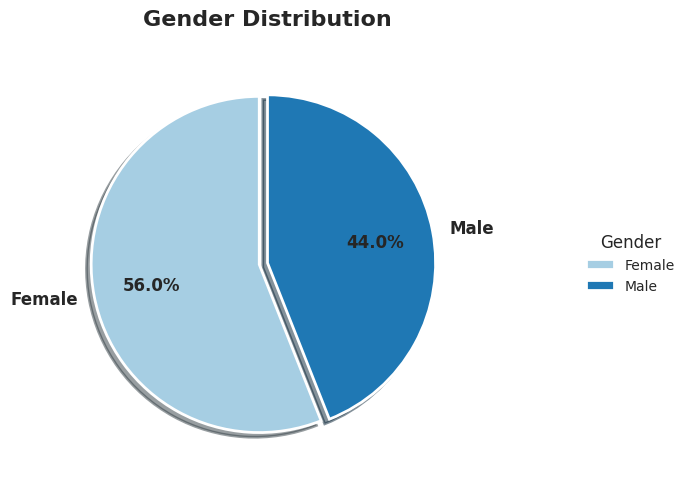

In [ ]:
# Set style
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create figure
plt.figure(figsize=(10, 5))

# Get data
gender_counts = df['Gender'].value_counts()
labels = ['Female', 'Male']

# Custom colors using seaborn color palettes
# colors = sns.color_palette("husl", 2)  # or other sns palettes:
# colors = sns.color_palette("Set2")
colors = sns.color_palette("Paired")
# colors = sns.color_palette("pastel")

# Create pie chart
wedges, texts, autotexts = plt.pie(gender_counts,
                                  explode=(0.05, 0),
                                  labels=labels,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  pctdistance=0.65,
                                  startangle=90,
                                  shadow=True,
                                  wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Add center circle for donut effect
centre_circle = plt.Circle((5,5), 0.80, fc='white')
plt.gca().add_artist(centre_circle)

# Style the text
plt.setp(autotexts, size=12, weight="bold")
plt.setp(texts, size=12, weight="bold")

# Add title
plt.title('Gender Distribution',
          pad=20,
          size=16,
          weight='bold')

# Add legend
plt.legend(wedges, labels,
          title="Gender",
          loc="center right",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Show percentages and counts
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})'
    return my_autopct

# Optional: Try different seaborn color palettes:


plt.tight_layout()
plt.show()

Next, we’ll analyze the age distribution by grouping ages into five categories and visualizing them with a bar chart. This technique, called binning, organizes numerical values into intervals or categories (bins). Binning simplifies the data, making it easier to identify and interpret patterns.

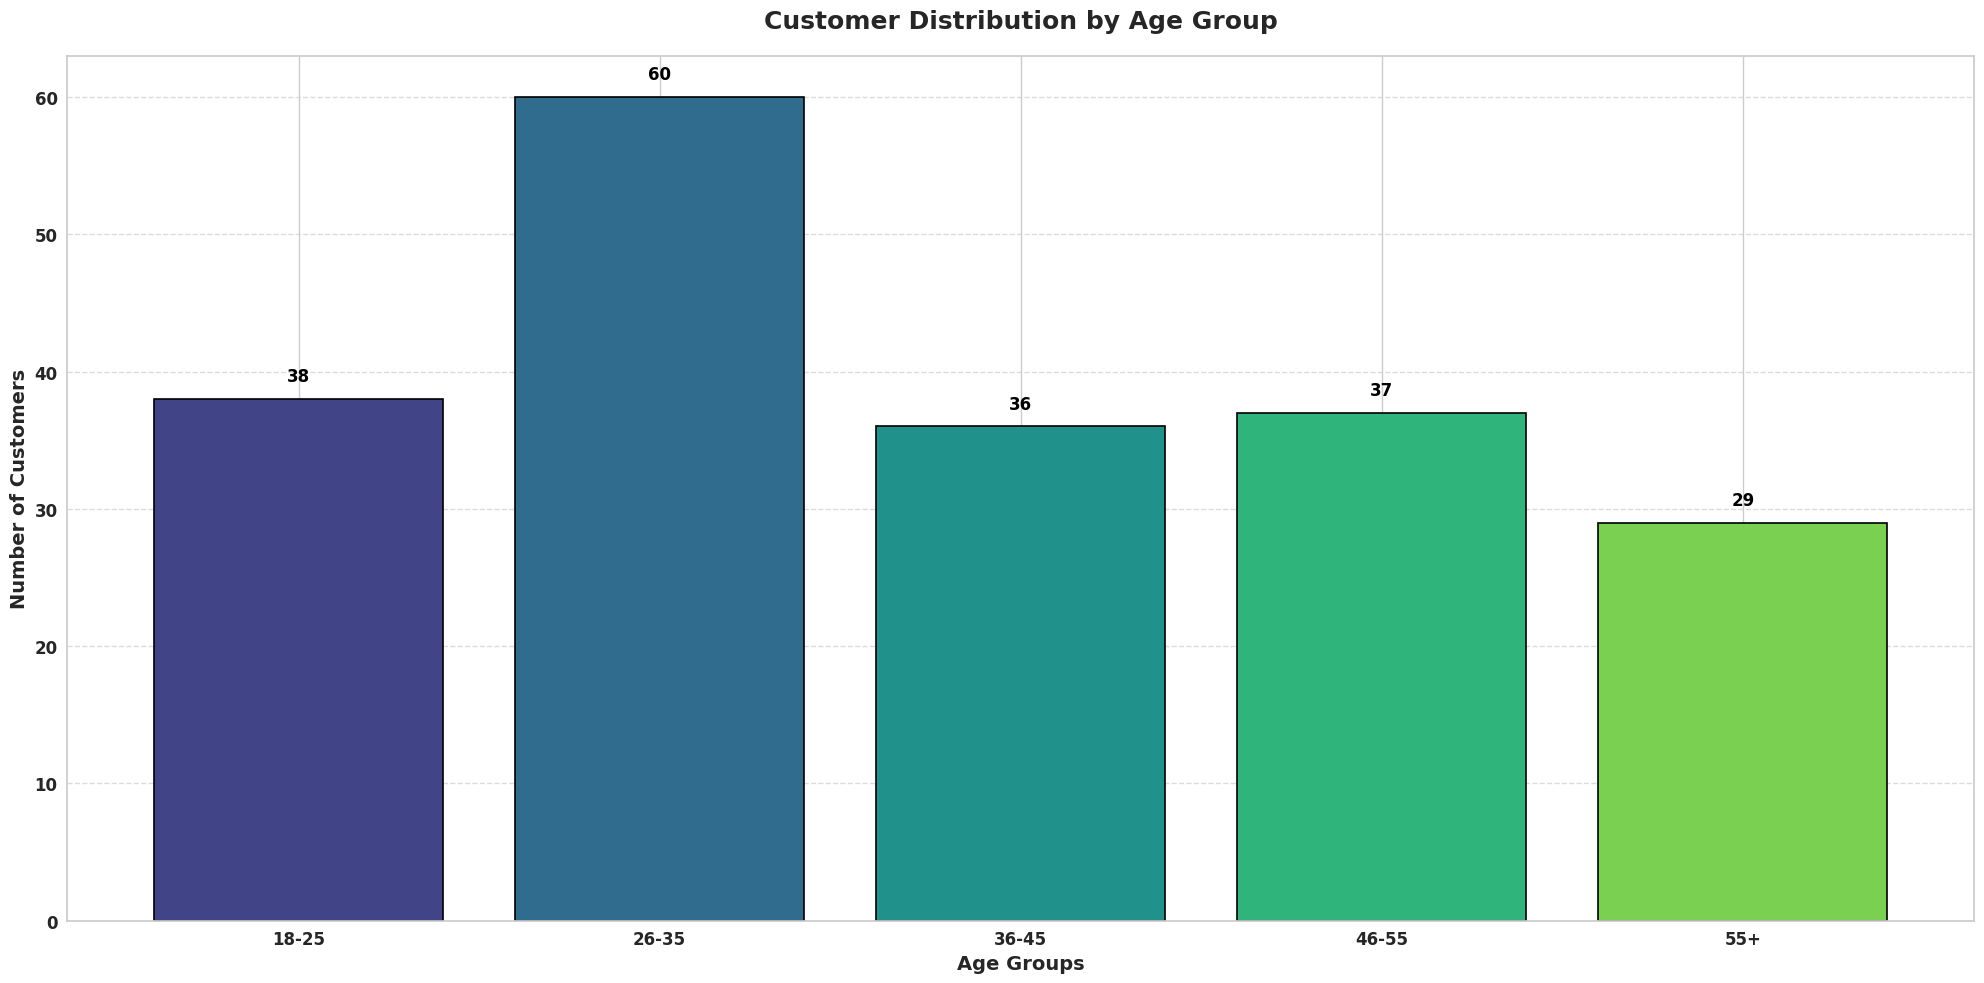

In [ ]:
import numpy as np

# Group age into categories and count them
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[(df.Age >= 56)]

# Organize data for plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25), len(age26_35), len(age36_45), len(age46_55), len(age55above)]

# Bar chart with gradient colors and rounded edges
plt.figure(figsize=(20, 10))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(x)))  # Gradient colors
bars = plt.bar(x, y, color=colors, edgecolor='black', linewidth=1.5)

# Add rounded edges to bars
for bar in bars:
    bar.set_linewidth(1.2)
    bar.set_edgecolor("black")
    bar.set_capstyle('round')

# Add title and labels with styling
plt.title("Customer Distribution by Age Group", fontsize=18, weight='bold', pad=20)
plt.xlabel("Age Groups", fontsize=14, weight='bold')
plt.ylabel("Number of Customers", fontsize=14, weight='bold')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 1,
             f"{y[i]}",
             ha="center",
             va="bottom",
             fontsize=12,
             weight="bold",
             color="black")

# Customize x-axis and y-axis ticks
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()


We’ll apply the same approach to customers’ annual income, grouping it into five categories for easier analysis and visualization.

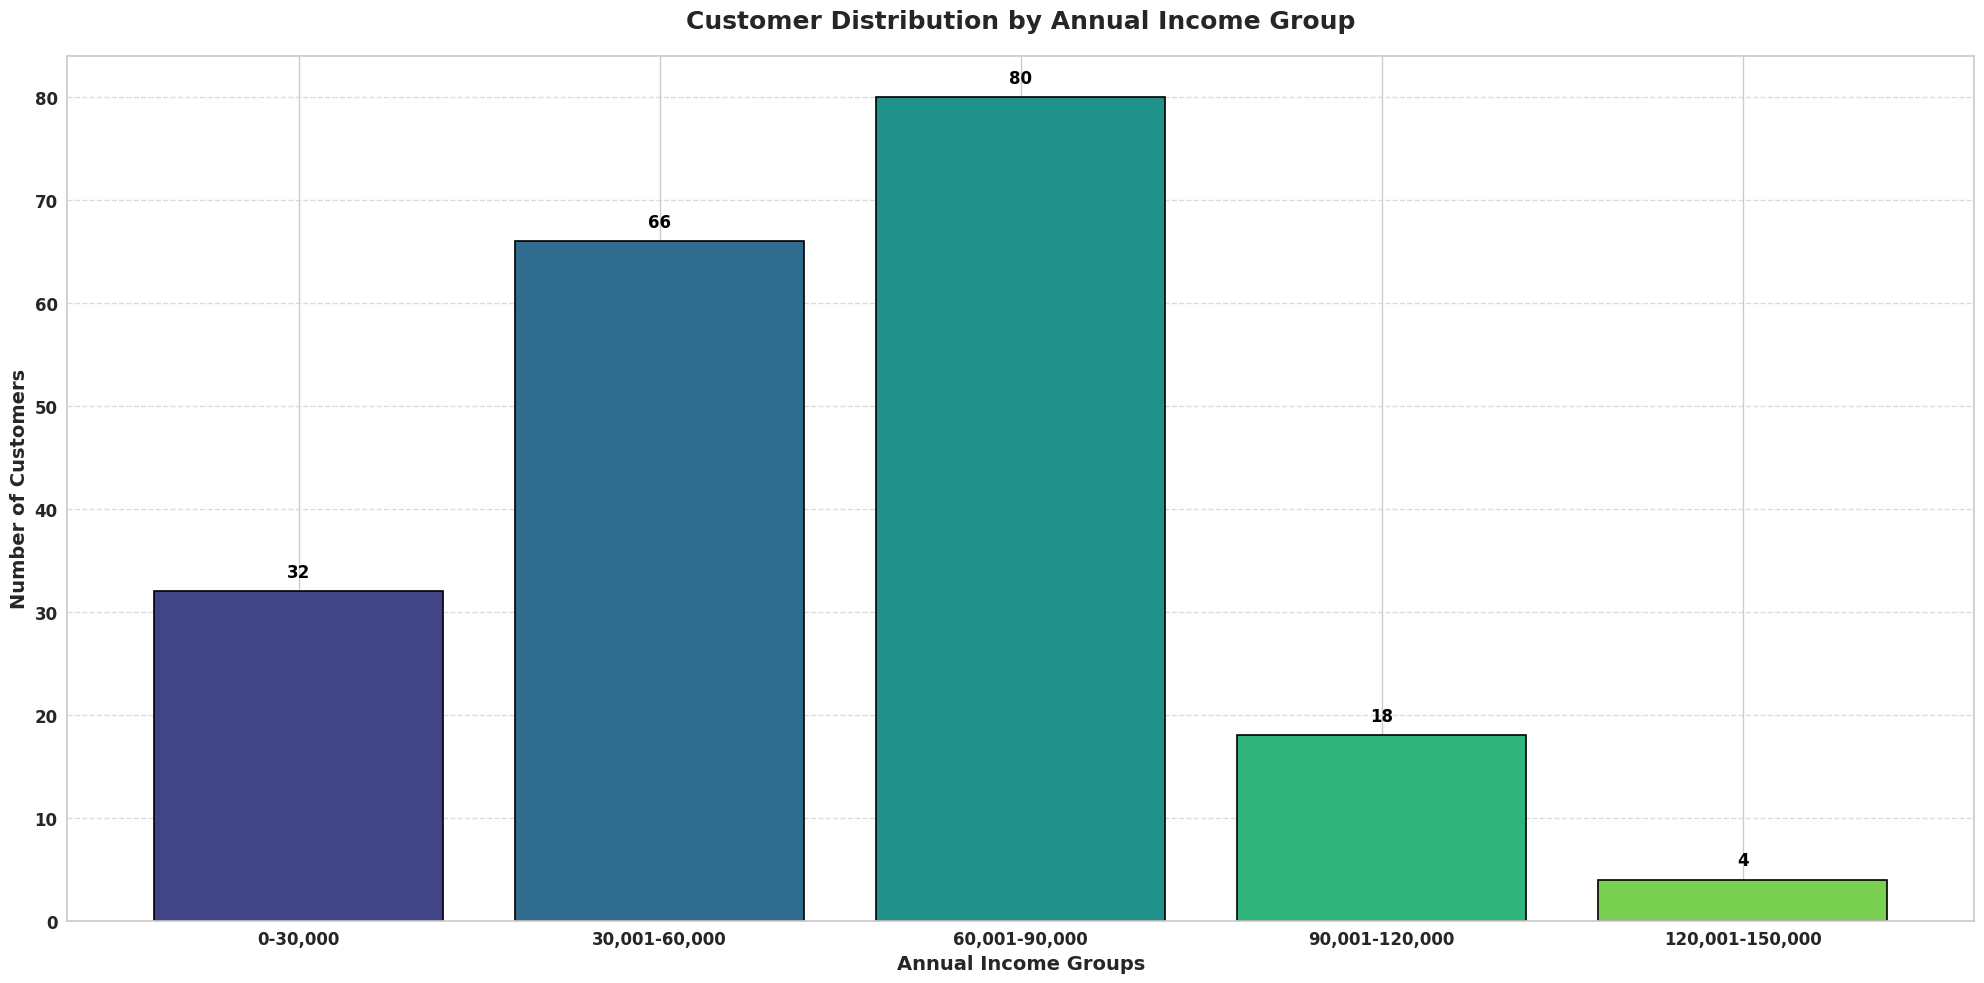

In [ ]:
import numpy as np

# Group annual income into categories and count them
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

# Organize data for plotting
x = ["0-30,000", "30,001-60,000", "60,001-90,000", "90,001-120,000", "120,001-150,000"]
y = [len(ai0_30), len(ai31_60), len(ai61_90), len(ai91_120), len(ai121_150)]

# Bar chart with gradient colors and rounded edges
plt.figure(figsize=(20, 10))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(x)))  # Gradient colors
bars = plt.bar(x, y, color=colors, edgecolor='black', linewidth=1.5)

# Add rounded edges to bars
for bar in bars:
    bar.set_linewidth(1.2)
    bar.set_edgecolor("black")
    bar.set_capstyle('round')

# Add title and labels with styling
plt.title("Customer Distribution by Annual Income Group", fontsize=18, weight='bold', pad=20)
plt.xlabel("Annual Income Groups", fontsize=14, weight='bold')
plt.ylabel("Number of Customers", fontsize=14, weight='bold')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 1,
             f"{y[i]}",
             ha="center",
             va="bottom",
             fontsize=12,
             weight="bold",
             color="black")

# Customize x-axis and y-axis ticks
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()


## Data Splitting

For the next step, Data Splitting, we’ll select two columns: Annual Income (k$) and Spending Score (1-100). The data from these columns will be stored in an array, X, for further analysis. Then, we’ll display it in a DataFrame format with the appropriate column names. This structured view makes it easier to check and interpret the values for annual income and spending score.

In [ ]:
# Choose column Annual Income and Spending Score
X = df.iloc[:, [3, 4]].values

# Show the data
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


## Build the Model

Before diving into clustering, we first need to determine the optimal number of clusters using the elbow method. This method helps us identify the ideal number of clusters by analyzing the changes in WCSS (Within-Cluster Sum of Squares) as the number of clusters increases.

By plotting a graph of WCSS against the number of clusters, we look for the 'elbow point'—the point where the decrease in WCSS starts to slow down significantly. This angle typically indicates the optimal number of clusters, helping us choose a structure that fits the data well while avoiding overfitting.

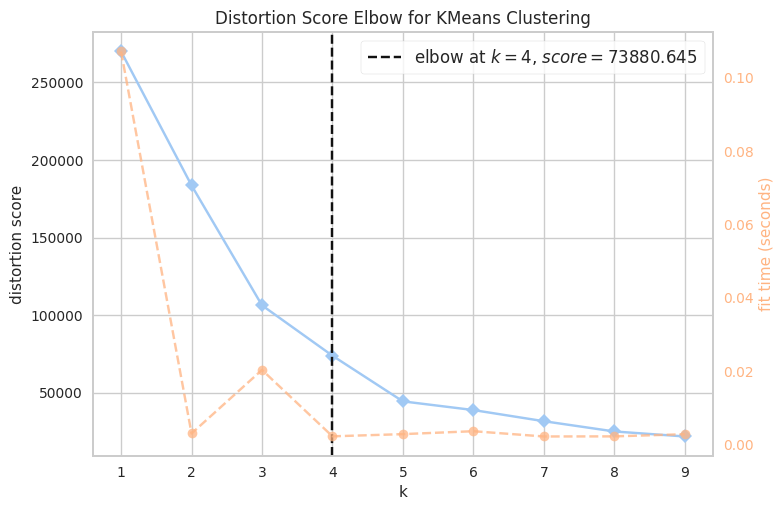

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Init KMeans model without initial parameter
kmeans = KMeans()

# Init visualizer KElbow to define optimal total cluster
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit the visualizer with data
visualizer.fit(X)

visualizer.show()

The results indicate that 4 is the optimal number of clusters, with a total WCSS of 73,880.645. This means the data can be effectively divided into 4 balanced groups or clusters for further analysis.

Next, we create a KMeans model and use an analyze_cluster function to examine the characteristics of each cluster. This function processes the data for each cluster based on the labels assigned by the model. For each cluster, it calculates the mean of the two features: Annual Income and Spending Score, giving us insights into the unique traits of each group.

In [ ]:
# For this we init KMeans model with optimal cluster = 4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Get the label
labels = kmeans.labels_

# Get total cluster
k = 4

# Function to analyze each cluster
def analyze_cluster(X, labels, k):
    print("Cluster Characteristic")

    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_income = cluster_data[:, 0].mean()
        mean_spending = cluster_data[:, 1].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Mean of Annual Income ($): {mean_income:.2f}")
        print(f"Mean of Spending Score (1-100): {mean_spending:.2f}")

analyze_cluster(X, labels, k)

Cluster Characteristic

Cluster 1:
Mean of Annual Income ($): 48.26
Mean of Spending Score (1-100): 56.48

Cluster 2:
Mean of Annual Income ($): 86.54
Mean of Spending Score (1-100): 82.13

Cluster 3:
Mean of Annual Income ($): 87.00
Mean of Spending Score (1-100): 18.63

Cluster 4:
Mean of Annual Income ($): 26.30
Mean of Spending Score (1-100): 20.91


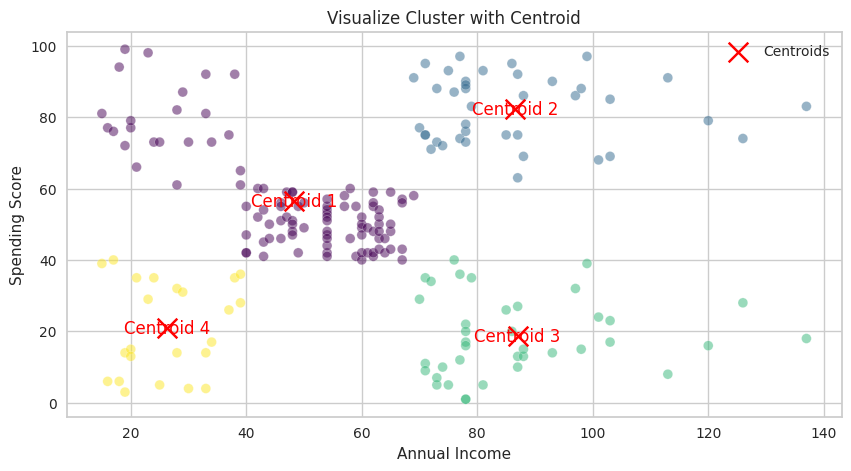

Centroid value:
Centroid 1: Annual Income = 48.26, Spending Score = 56.48
Centroid 2: Annual Income = 86.54, Spending Score = 82.13
Centroid 3: Annual Income = 87.00, Spending Score = 18.63
Centroid 4: Annual Income = 26.30, Spending Score = 20.91


In [ ]:
# define the position of centroid
centroids = kmeans.cluster_centers_

# Visualize cluster
plt.figure(figsize=(10, 5))

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5, edgecolors='w', marker='o')

# Plot the centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Add label centroid in plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title("Visualize Cluster with Centroid")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()

plt.show()

print("Centroid value:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")